157.58081511436387 -1.2095119648598853 0.02108005977579351
2.1017056 0.25506702
3.1690684948758516 2.8806562827442668
1.2087531393077633 0.18468659560958844 1.727280926940714


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Max : 9.752
Min : 0.003
Max : 119.09
Min : 0.016


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


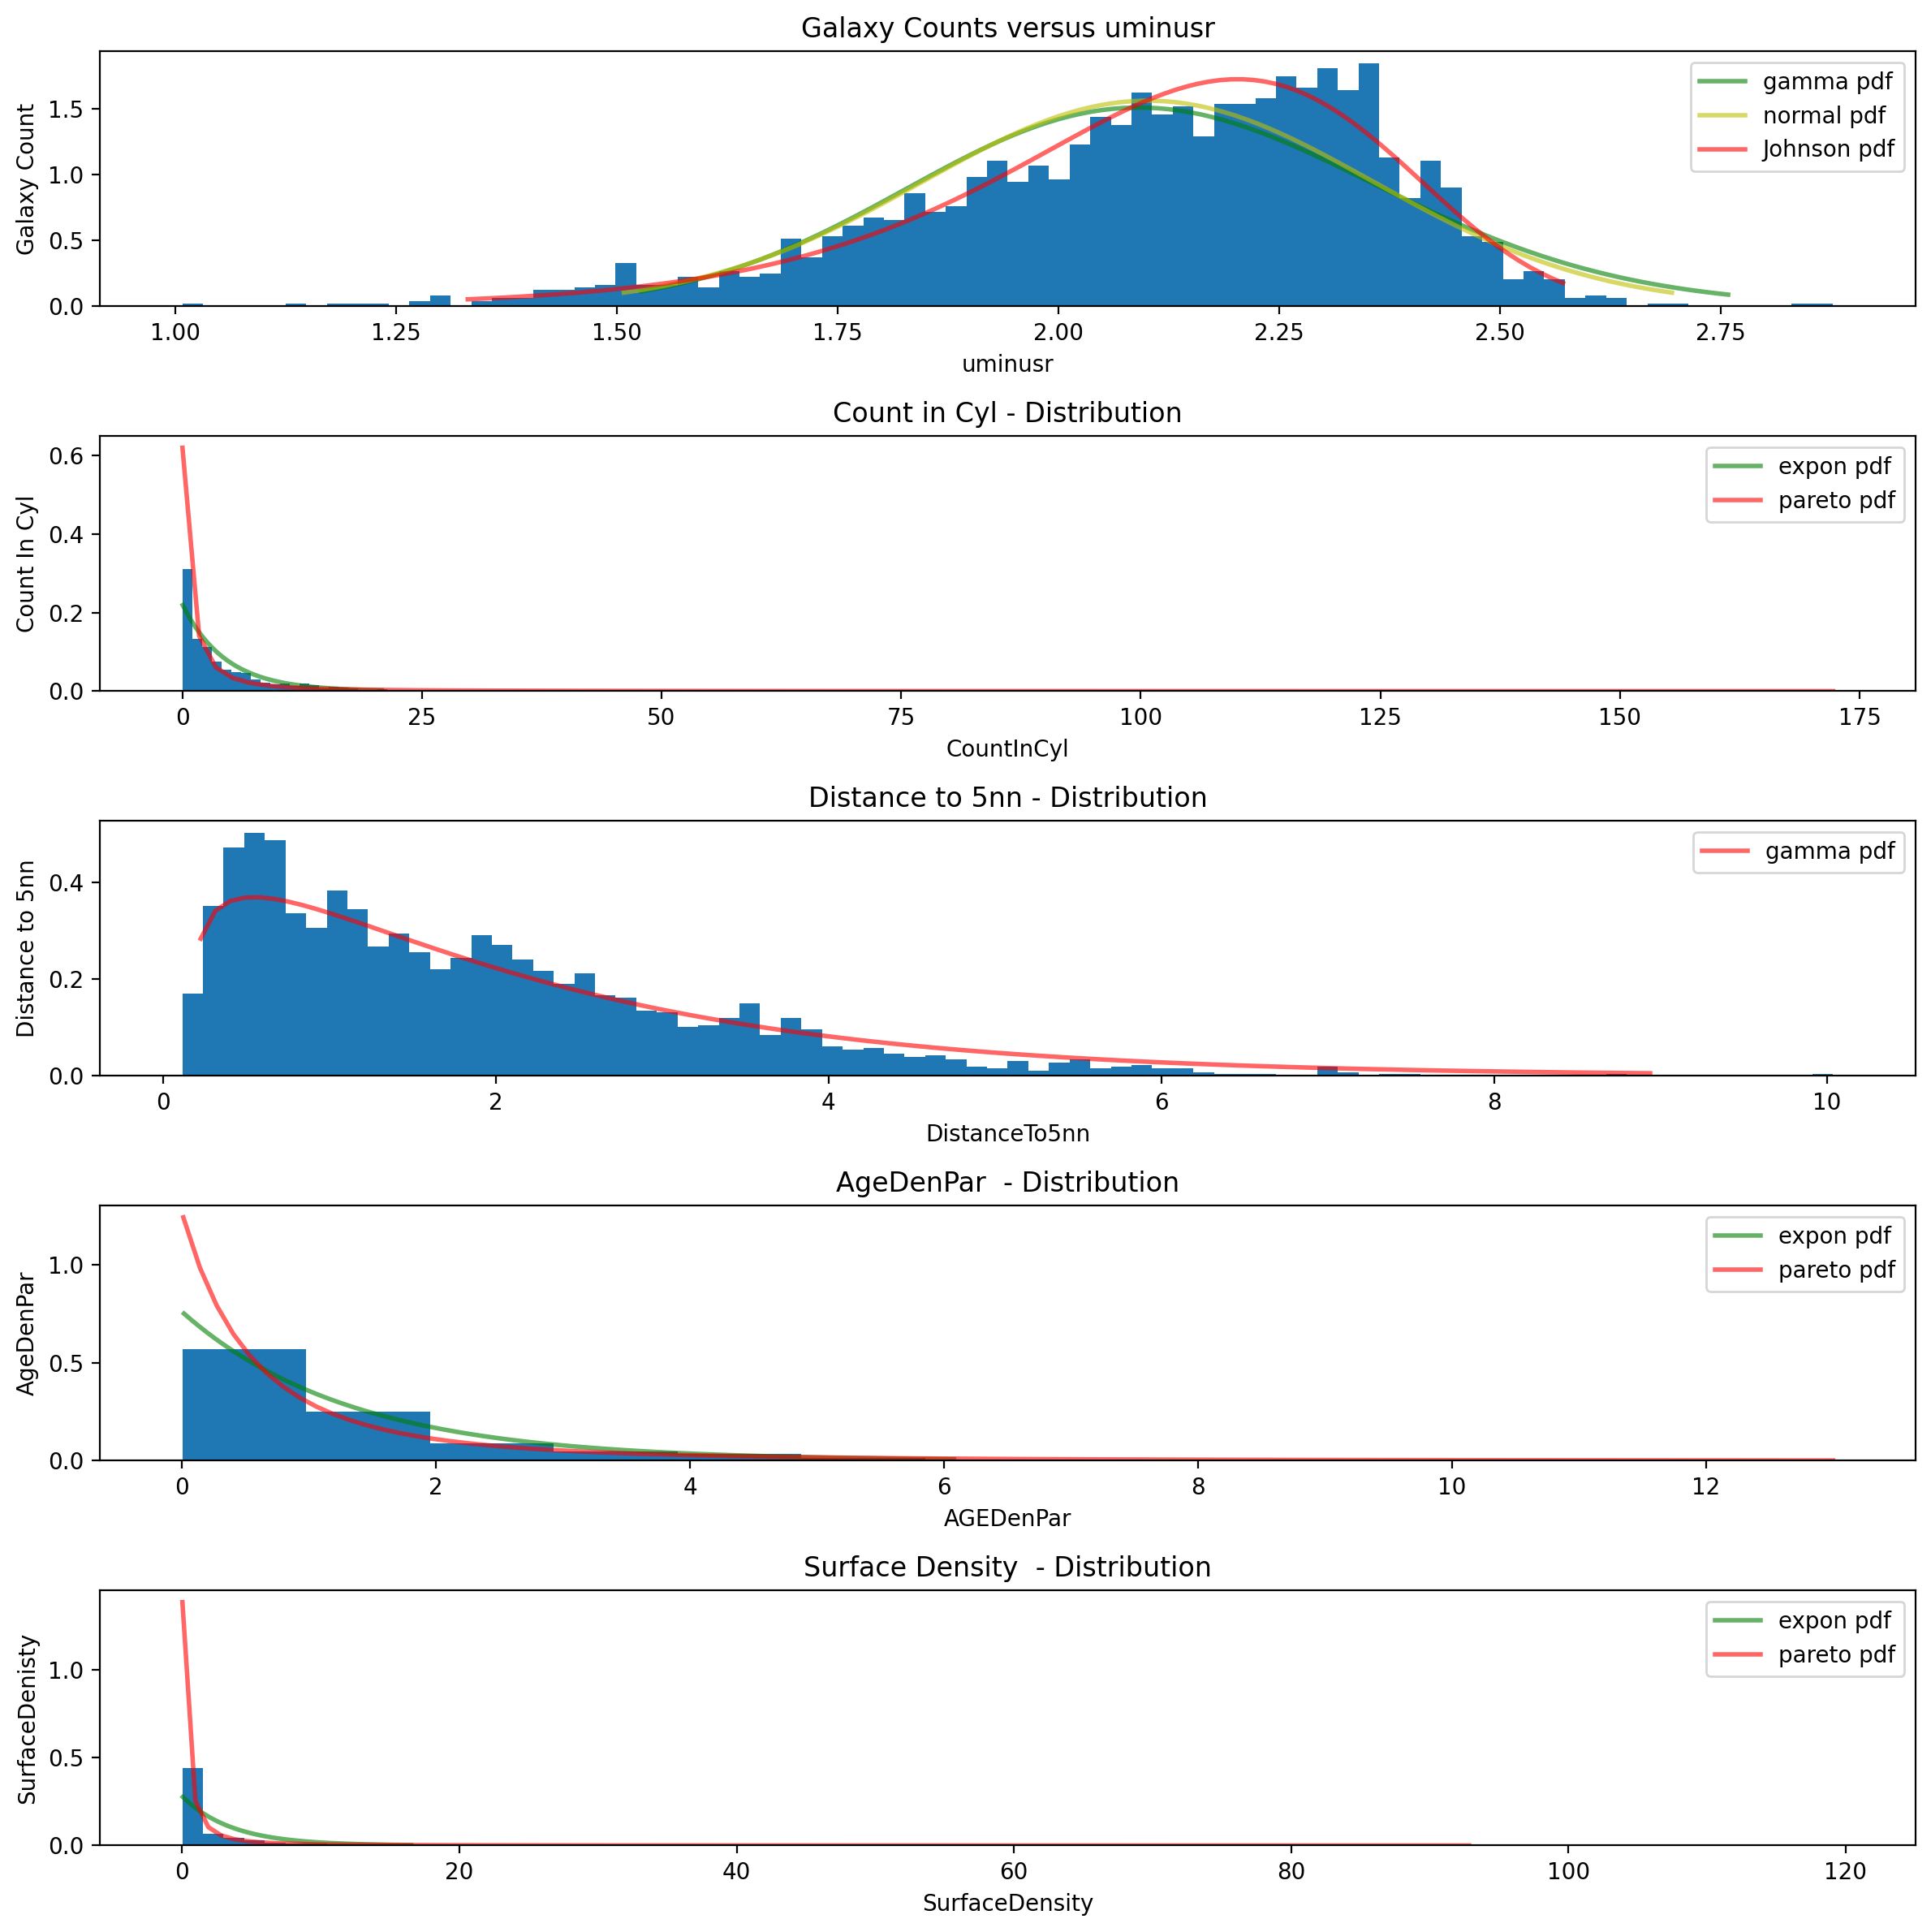

In [23]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

#print(RawMassEClassEmeasure.colnames)
# CLEAN DATA
RErange = Table.read('../../GAMA_Data/EMassEClassEmeasure.fits')
RErange = RErange[RErange['SurfaceDensityFlag'] == 0]
#RErange = RErange[RErange['DistanceTo5nnFlag'] == 0]
#RErange = RErange[RErange['SurfaceDensity'] < 50]
RErange = RErange[RErange['AGEDenParFlag'] == 0]
RErange = RErange[RErange['CountInCylFlag'] == 0]
RErange = RErange[RErange['uminusr']> 0.001]

binCount = 80
alphaVal = .3

##### uminusr
fig = plt.figure(figsize=(12, 12), dpi=200)

#fig.suptitle('Plot - Histogram Red Galaxies for Elliptical Galaxies')
#fig.legend(loc="upper right")
#import scipy.stats as stats
from scipy import stats
xfield = 'uminusr'
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#print(counts)

ax1 = fig.add_subplot(5, 1, 1)
ax1.title.set_text('Galaxy Counts versus uminusr')
ax1.set_ylabel('Galaxy Count')
ax1.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

ag, bg, cg =stats.gamma.fit(RErange[xfield].data)
print(ag, bg, cg)
xg0, xg1 = stats.gamma.ppf([0.01, 0.99], ag, loc = bg, scale=cg)
xg = np.linspace(xg0,xg1,100)

an, bn =stats.norm.fit(RErange1[xfield].data)
print(an, bn)
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

aj, bj, cj, dj =stats.johnsonsu.fit(RErange[xfield].data)
print(aj, bj)
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)

ax1.plot(xg, stats.gamma.pdf(xg, ag, loc=bg, scale=cg),'g-', lw=2, alpha=0.6, label='gamma pdf')
ax1.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax1.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax1.hist(RErange[xfield].data, bins=binCount, density=True)
#ax1.set_xlabel(xfield)
ax1.set_xlabel('uminusr')
ax1.legend()

xfield = 'CountInCyl'
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#print(counts)
ax2 = fig.add_subplot(5, 1, 2)
ax2.title.set_text('Count in Cyl - Distribution')
ax2.set_ylabel('Count In Cyl')
ax2.set_xlabel(xfield)
#ae, be, ce = stats.expon.fit(RErange1[xfield].data)
ae, be = stats.expon.fit(RErange[xfield].data)
xe0, xe1 = stats.expon.ppf([0.01, 0.99], loc=ae, scale=be)
xe = np.linspace(xe0,xe1,100)

#v = stats.pareto.fit(RErange1[xfield].data)
#print(len(v))
ap, bp, cp = stats.pareto.fit(RErange[xfield].data)
xp0, xp1 = stats.pareto.ppf([0.01, 0.99], ap, loc=bp, scale=cp)
xp = np.linspace(xp0,xp1,100)

#ax2.plot(xg, stats.geom.pdf(xg, loc=ag, scale=bg),'g-', lw=2, alpha=0.6, label='geom pdf')
ax2.plot(xe, stats.expon.pdf(xe, loc=ae, scale=be),'g-', lw=2, alpha=0.6, label='expon pdf')
ax2.plot(xp, stats.pareto.pdf(xp, ap, loc=bp, scale=cp),'r-', lw=2, alpha=0.6, label='pareto pdf')
ax2.hist(RErange[xfield].data, bins=int(max(RErange[xfield])), density=True)
ax2.legend()

xfield = 'DistanceTo5nn'
ax3 = fig.add_subplot(5, 1, 3)
ax3.title.set_text('Distance to 5nn - Distribution')
ax3.set_ylabel('Distance to 5nn')
ax3.set_xlabel(xfield)
ag, bg, cg =stats.gamma.fit(RErange1[xfield].data)
print(ag, bg, cg)
xg0, xg1 = stats.gamma.ppf([0.01, 0.99], ag, loc=bg, scale=cg)
xg = np.linspace(xg0,xg1, 100)

ax3.hist(RErange[xfield].data, bins=binCount, density=True)
ax3.plot(xg, stats.gamma.pdf(xg, ag, loc=bg, scale = cg),'r-', lw=2, alpha=0.6, label='gamma pdf')
ax3.legend()

xfield = 'AGEDenPar'
ax4 = fig.add_subplot(5, 1, 4)
ax4.title.set_text('AgeDenPar  - Distribution')
ax4.set_ylabel('AgeDenPar')
ax4.set_xlabel(xfield)
print('Max : '+str(max(RErange[xfield])))
print('Min : '+str(min(RErange[xfield])))

aae, bae = stats.expon.fit(RErange[xfield].data)
xae0, xae1 = stats.expon.ppf([0.01, 0.99], loc=aae, scale=bae)
xae = np.linspace(xae0,xae1,100)

#v = stats.pareto.fit(RErange1[xfield].data)
#print(len(v))
aap, bap, cap = stats.pareto.fit(RErange[xfield].data)
xap0, xap1 = stats.pareto.ppf([0.01, 0.99], aap, loc=bap, scale=cap)
xap = np.linspace(xap0,xap1,100)

#ax2.plot(xg, stats.geom.pdf(xg, loc=ag, scale=bg),'g-', lw=2, alpha=0.6, label='geom pdf')
ax4.plot(xae, stats.expon.pdf(xae, loc=aae, scale=bae),'g-', lw=2, alpha=0.6, label='expon pdf')
ax4.plot(xap, stats.pareto.pdf(xap, aap, loc=bap, scale=cap),'r-', lw=2, alpha=0.6, label='pareto pdf')
ax4.hist(RErange[xfield], bins=int(1+max(RErange[xfield])), density=True)
#ax4.plot(xag, stats.gamma.pdf(xag, aag, loc=bag, scale = cag),'r-', lw=2, alpha=0.6, label='gamma pdf')
ax4.legend()

xfield = 'SurfaceDensity'
ax5 = fig.add_subplot(5, 1, 5)
ax5.title.set_text('Surface Density  - Distribution')
ax5.set_ylabel('SurfaceDenisty')
ax5.set_xlabel(xfield)
print('Max : '+str(max(RErange[xfield])))
print('Min : '+str(min(RErange[xfield])))

ase, bse = stats.expon.fit(RErange[xfield].data)
xse0, xse1 = stats.expon.ppf([0.01, 0.99], loc=ase, scale=bse)
xse = np.linspace(xse0,xse1,100)

#v = stats.pareto.fit(RErange1[xfield].data)
#print(len(v))
asp, bsp, csp = stats.pareto.fit(RErange[xfield].data)
xsp0, xsp1 = stats.pareto.ppf([0.01, 0.99], asp, loc=bsp, scale=csp)
xsp = np.linspace(xsp0,xsp1,100)

#ax2.plot(xg, stats.geom.pdf(xg, loc=ag, scale=bg),'g-', lw=2, alpha=0.6, label='geom pdf')
ax5.plot(xse, stats.expon.pdf(xse, loc=ase, scale=bse),'g-', lw=2, alpha=0.6, label='expon pdf')
ax5.plot(xsp, stats.pareto.pdf(xsp, asp, loc=bsp, scale=csp),'r-', lw=2, alpha=0.6, label='pareto pdf')
ax5.hist(RErange[xfield].data, bins=binCount, density=True)
#ax5.plot(xag, stats.gamma.pdf(xs, aas, loc=bs, scale = cs),'r-', lw=2, alpha=0.6, label='gamma pdf')
ax5.legend()


fig.tight_layout()
plt.show()




